In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [14]:
data = pd.read_csv('accidental-deaths-in-usa-monthly.csv', header=0, index_col=0)

In [16]:
data.tail()

,Accidental deaths
Month,
1978-08,9827
1978-09,9110
1978-10,9070
1978-11,8633
1978-12,9240


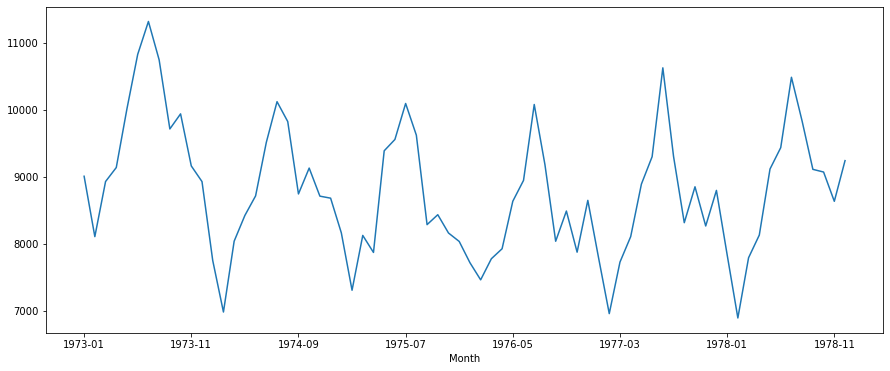

In [17]:
data['Accidental deaths'].plot(figsize=(15,6))
plt.show()

In [18]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='aic')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','No of Lags','No of Obsv'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [19]:
Augmented_Dickey_Fuller_Test_func(data['Accidental deaths'],'Accidental deaths')

Results of Dickey-Fuller Test for column: Accidental deaths
Test Statistics         -2.555798
p-value                  0.102481
No of Lags              12.000000
No of Obsv              59.000000
Critical Value (1%)     -3.546395
Critical Value (5%)     -2.911939
Critical Value (10%)    -2.593652
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Performing 1st Differencing

<AxesSubplot:xlabel='Month'>

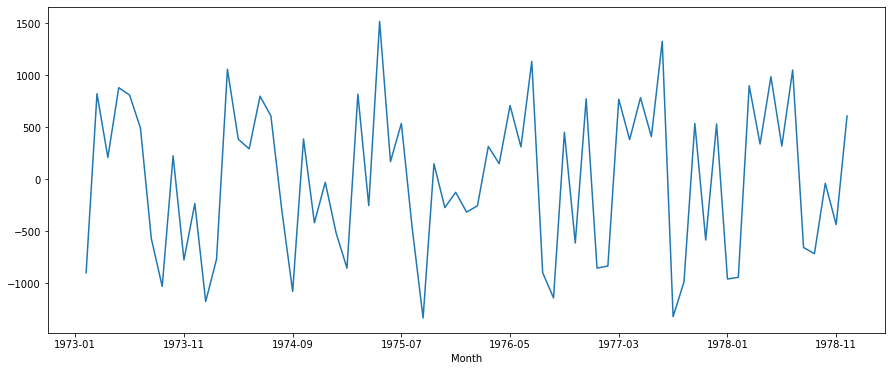

In [20]:
data['Accidental deaths'] = data['Accidental deaths'].diff()
data['Accidental deaths'].plot(figsize=(15,6))

In [21]:
Augmented_Dickey_Fuller_Test_func(data['Accidental deaths'].dropna(),'Accidental deaths')

Results of Dickey-Fuller Test for column: Accidental deaths
Test Statistics         -2.432257
p-value                  0.132838
No of Lags              12.000000
No of Obsv              58.000000
Critical Value (1%)     -3.548494
Critical Value (5%)     -2.912837
Critical Value (10%)    -2.594129
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Performing Second Differencing

<AxesSubplot:xlabel='Month'>

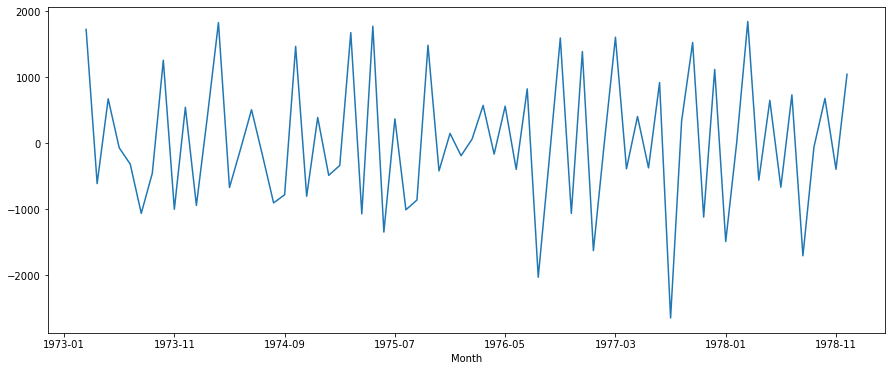

In [22]:
data['Accidental deaths'] = data['Accidental deaths'].diff()
data['Accidental deaths'].plot(figsize=(15,6))

In [23]:
Augmented_Dickey_Fuller_Test_func(data['Accidental deaths'].dropna(),'Accidental deaths')

Results of Dickey-Fuller Test for column: Accidental deaths
Test Statistics        -8.918927e+00
p-value                 1.053992e-14
No of Lags              1.100000e+01
No of Obsv              5.800000e+01
Critical Value (1%)    -3.548494e+00
Critical Value (5%)    -2.912837e+00
Critical Value (10%)   -2.594129e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Thus, after the second differencing, our data is stationary